In [1]:
import random
import numpy as np
import pandas as pd
import xlsxwriter
np.set_printoptions(suppress=True)


In [2]:
x = np.array([1729, 1794, 1748, 1582, 1590, 1628, 1798, 1342, 1652, 1302, 1805, 1889, 1572, 1619, 1894, 1631, 1471, 1468, 1534, 1607, 1370, 1431, 1395, 1374, 1745, 1721, 1812, 1617, 1316, 1899, 1833, 1322, 1877, 1585, 1408, 1785, 1884, 1719, 1586, 1352, 1346, 1727, 1703, 1806, 1492, 1759, 1614, 1707, 1810, 1423, 1312, 1675, 1635, 1451, 1891, 1304, 1872, 1677, 1754, 1621])

In [3]:
x = np.sort(x)

In [47]:
n = len(x)
r = 6
x_min = 1300
x_av = 1600
x_max = 1900
dx = (x_max-x_min)/r
ran1 = np.array([x_min + dx*i for i in range(r)])
ran2 = np.array([x_min + dx*(i+1) for i in range(r)])

In [58]:
from statistics import NormalDist
from scipy.stats import norm
(NormalDist().cdf((ran2[0] - x_av)/Sx) - NormalDist().cdf((ran1[0] - x_av)/Sx),
norm.cdf((ran2[0] - x_av)/Sx) - norm.cdf((ran1[0] - x_av)/Sx))

(0.06241060046905034, 0.06241060046905028)

In [5]:
Sx = np.sqrt(np.sum((x - x_av)**2)/r)

In [6]:
m = np.array([len(x[(x < x_min + dx*i) & (x > x_min + dx*(i-1))]) for i in np.arange(1,r+1)])

In [59]:
from scipy.stats import laplace, norm

In [64]:
P = np.array([m[i]/len(x) for i in np.arange(len(m))])
Pi = norm.pdf((ran2 - x_av)/Sx) - norm.pdf((ran1 - x_av)/Sx)

In [65]:
ksi = (m - n*Pi)**2/(n*Pi)
pirs = np.sum(ksi)
k = r - 3

In [45]:
(m - n*Pi), n*Pi

(array([ 9.39645316,  5.97957715,  5.64970612, 11.35029388, 14.02042285,
        13.60354684]),
 array([ 1.60354684,  1.02042285,  0.35029388, -0.35029388, -1.02042285,
        -1.60354684]))

In [9]:
data_pd = pd.DataFrame()
data_pd['№'] = np.arange(1,61,dtype='int')
data_pd['X'] = x

In [10]:
data_pd2 = pd.DataFrame()
data_pd2['m'] = m
data_pd2['P*'] = P
data_pd2['Pi'] = Pi
data_pd2['Ksi'] = ksi
data_pd2['Промежутки x'] = [ran[i] for i in np.arange(r)]

In [11]:
data_pd3 = pd.DataFrame()
data_pd3['n'] = ['x_min','x_av','x_max','dx','Sx','Pirs']
data_pd3[f'{n}'] = [x_min,x_av,x_max,dx,Sx,pirs]

In [12]:
data_pd4 = pd.DataFrame()
data_pd4['x'] = [1,2,2,3,3,4,4,5,5,6,6]
data_pd4['y'] = [11,11,7,7,6,6,11,11,13,13,12]

In [13]:
data_pd = pd.concat([data_pd,data_pd2,data_pd3,data_pd4],axis=1)

In [14]:
with pd.ExcelWriter('lab2.xlsx') as writer:
    data_pd.to_excel(writer,index=None, sheet_name='lab2')
    

In [15]:
import matplotlib.pyplot as plt

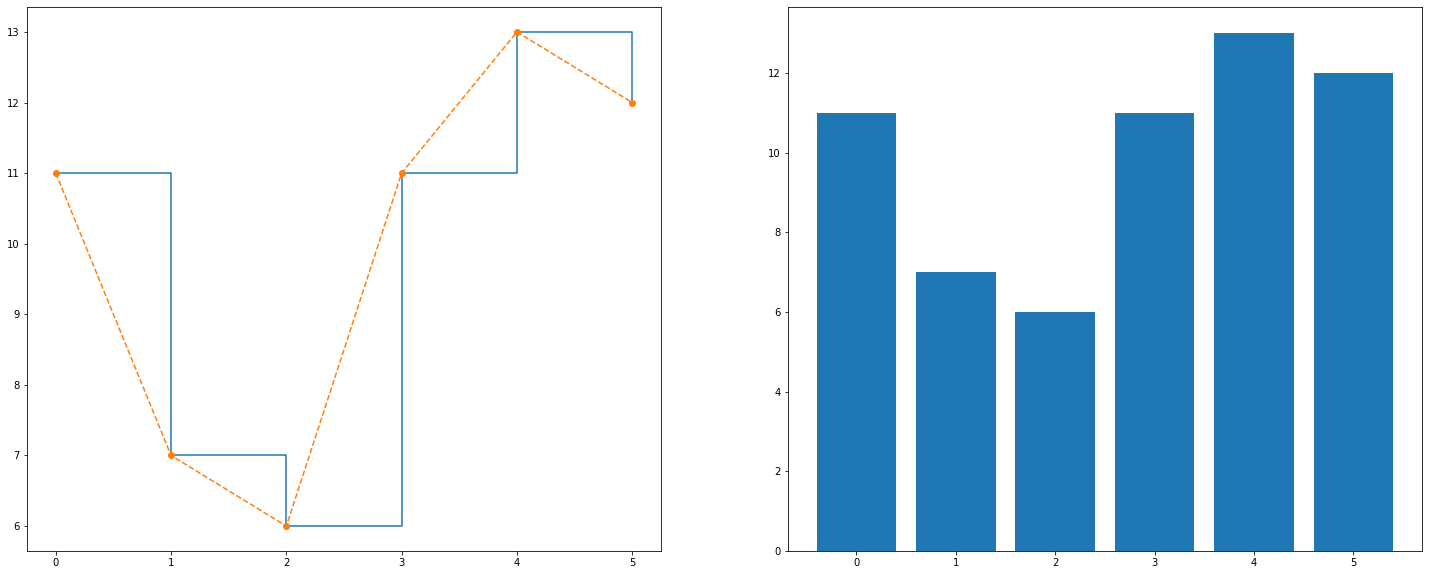

In [16]:
plt.figure(figsize=(25,10))
plt.subplot(121)
plt.step(np.arange(r),m, where='post')
plt.plot(np.arange(r),m,'o--')
plt.subplot(122)
plt.bar(np.arange(r),m)
plt.show()